<a href="https://colab.research.google.com/github/jeanmhuang/Daily-Quant-Notes/blob/main/2025_09_09_LLN_and_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 2025-09-09 — LLN + Monte Carlo Combined Demos



- **Law of Large Numbers (LLN)** — Bernoulli, Dice, Uniform(0,1) + Chebyshev check  
- **Monte Carlo Demos** — Random Walks, GBM, and Monte Carlo European Call with a Black–Scholes comparison



In [1]:

import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt, log, exp

# Reproducibility
np.random.seed(9)

# Inline plots
%matplotlib inline



## Part A — Law of Large Numbers (LLN)



### A.1 Bernoulli Coin Flips (p = 0.5)
We simulate i.i.d. Bernoulli(0.5) and plot running means:


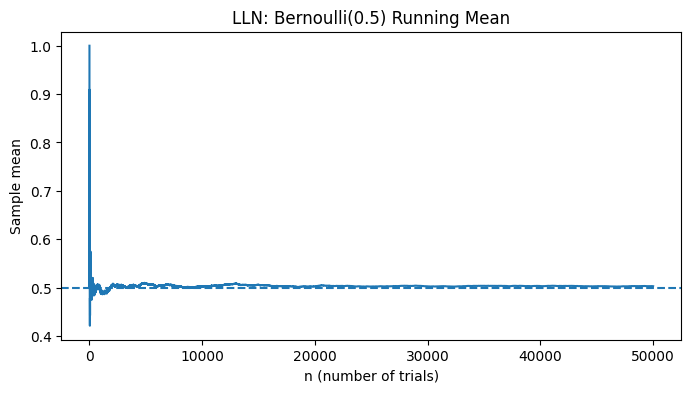

Final sample mean (n=50000): 0.50288 | Theoretical: 0.50000


In [2]:

p = 0.5
N = 50_000
x = (np.random.rand(N) < p).astype(float)
running_mean = np.cumsum(x) / (np.arange(N) + 1)

plt.figure(figsize=(8, 4))
plt.plot(running_mean)
plt.axhline(0.5, linestyle='--')
plt.title("LLN: Bernoulli(0.5) Running Mean")
plt.xlabel("n (number of trials)")
plt.ylabel("Sample mean")
plt.show()

print(f"Final sample mean (n={N}): {running_mean[-1]:.5f} | Theoretical: 0.50000")



### A.2 Fair Dice Rolls
For a fair die, \(\mathbb{E}[X]=3.5\). Running mean should approach 3.5.


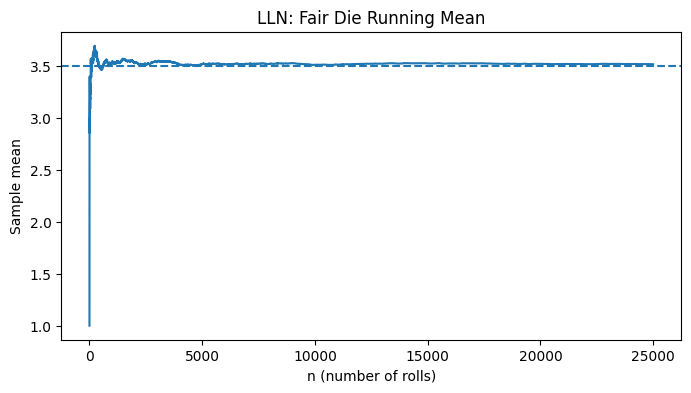

Final sample mean (n=25000): 3.51836 | Theoretical: 3.50000


In [3]:

N = 25_000
dice = np.random.randint(1, 7, size=N)
running_mean_dice = np.cumsum(dice) / (np.arange(N) + 1)

plt.figure(figsize=(8, 4))
plt.plot(running_mean_dice)
plt.axhline(3.5, linestyle='--')
plt.title("LLN: Fair Die Running Mean")
plt.xlabel("n (number of rolls)")
plt.ylabel("Sample mean")
plt.show()

print(f"Final sample mean (n={N}): {running_mean_dice[-1]:.5f} | Theoretical: 3.50000")



### A.3 Uniform(0,1) and Chebyshev's Inequality
\(\mu = 0.5\), \(\mathrm{Var}(X)=1/12\). We compare empirical deviation probabilities to Chebyshev's bound.


n		eps		Empirical P(|X̄ - 0.5| ≥ eps)	Chebyshev Bound
100     	0.01  	    0.7175			    1.0000
100     	0.02  	    0.4800			    1.0000
100     	0.05  	    0.0938			    0.3333
100     	0.1   	    0.0000			    0.0833
500     	0.01  	    0.4175			    1.0000
500     	0.02  	    0.1212			    0.4167
500     	0.05  	    0.0000			    0.0667
500     	0.1   	    0.0000			    0.0167
1000    	0.01  	    0.2863			    0.8333
1000    	0.02  	    0.0250			    0.2083
1000    	0.05  	    0.0000			    0.0333
1000    	0.1   	    0.0000			    0.0083
5000    	0.01  	    0.0100			    0.1667
5000    	0.02  	    0.0000			    0.0417
5000    	0.05  	    0.0000			    0.0067
5000    	0.1   	    0.0000			    0.0017
10000   	0.01  	    0.0000			    0.0833
10000   	0.02  	    0.0000			    0.0208
10000   	0.05  	    0.0000			    0.0033
10000   	0.1   	    0.0000			    0.0008


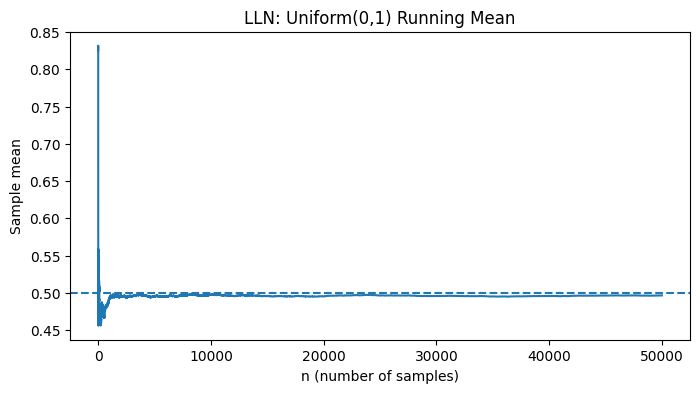

Final sample mean (n=50000): 0.49656 | Theoretical: 0.50000


In [4]:

def empirical_prob_deviation(n, eps, trials=1000):
    mu = 0.5
    count = 0
    for _ in range(trials):
        x = np.random.rand(n)
        xbar = x.mean()
        if abs(xbar - mu) >= eps:
            count += 1
    return count / trials

epsilons = [0.01, 0.02, 0.05, 0.1]
ns = [100, 500, 1000, 5000, 10000]
var = 1/12

results = []
for n in ns:
    for eps in epsilons:
        emp = empirical_prob_deviation(n, eps, trials=800)
        bound = var / (n * eps**2)
        results.append((n, eps, emp, min(1.0, bound)))

print("n		eps		Empirical P(|X̄ - 0.5| ≥ eps)	Chebyshev Bound")
for (n, eps, emp, bnd) in results:
    print(f"{n:<8}	{eps:<6}	{emp:>10.4f}			{bnd:>10.4f}")

N = 50_000
u = np.random.rand(N)
running_mean_u = np.cumsum(u) / (np.arange(N) + 1)

plt.figure(figsize=(8, 4))
plt.plot(running_mean_u)
plt.axhline(0.5, linestyle='--')
plt.title("LLN: Uniform(0,1) Running Mean")
plt.xlabel("n (number of samples)")
plt.ylabel("Sample mean")
plt.show()

print(f"Final sample mean (n={N}): {running_mean_u[-1]:.5f} | Theoretical: 0.50000")



> **LLN Takeaway:** Sample means converge to their expectations as \(n\) grows, with variability shrinking at roughly \(\mathcal{O}(1/\sqrt{n})\).



## Part B — Monte Carlo Demos



### B.1 Simple Random Walk
Simulate symmetric \(\pm 1\) steps; terminal std grows like \(\sqrt{T}\).


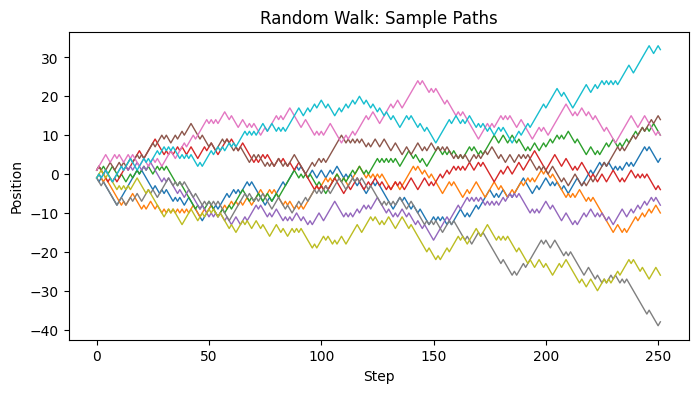

Terminal mean: -2.520
Terminal std:  17.879 (theoretical ~ sqrt(T) = 15.875)


In [5]:

T = 252
n_paths = 50
step_choices = np.array([-1, 1])

steps = np.random.choice(step_choices, size=(n_paths, T))
rw_paths = steps.cumsum(axis=1)

plt.figure(figsize=(8, 4))
for i in range(min(n_paths, 10)):
    plt.plot(rw_paths[i], linewidth=1)
plt.title("Random Walk: Sample Paths")
plt.xlabel("Step")
plt.ylabel("Position")
plt.show()

terminal = rw_paths[:, -1]
print(f"Terminal mean: {terminal.mean():.3f}")
print(f"Terminal std:  {terminal.std(ddof=1):.3f} (theoretical ~ sqrt(T) = {np.sqrt(T):.3f})")



### B.2 Geometric Brownian Motion (GBM)
Discretization: \(S_{t+\Delta t}=S_t\exp((\mu-\tfrac12\sigma^2)\Delta t + \sigma\sqrt{\Delta t}\,Z)\).  
Expectation: \(\mathbb{E}[S_T]=S_0 e^{\mu T}\).


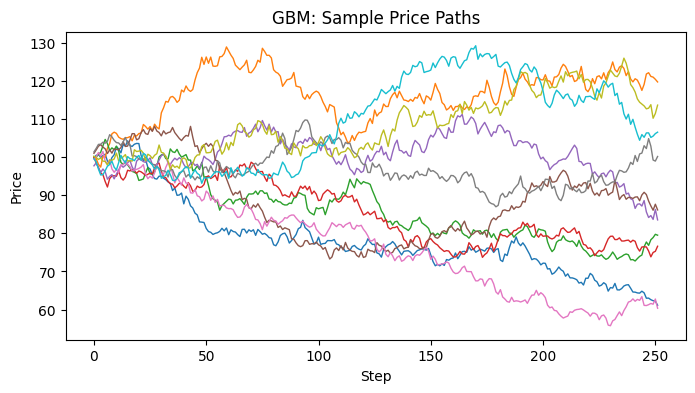

Monte Carlo E[S_T]: 107.665
Analytical  E[S_T]: 108.329
Absolute error: 0.664


In [6]:

S0 = 100.0
mu = 0.08
sigma = 0.2
T_years = 1.0
steps = 252
dt = T_years / steps
paths = 2000

log_increments = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.randn(paths, steps)
log_paths = np.cumsum(log_increments, axis=1)
S_paths = S0 * np.exp(log_paths)

plt.figure(figsize=(8, 4))
for i in range(10):
    plt.plot(S_paths[i], linewidth=1)
plt.title("GBM: Sample Price Paths")
plt.xlabel("Step")
plt.ylabel("Price")
plt.show()

S_T = S_paths[:, -1]
mc_mean = S_T.mean()
analytical = S0 * np.exp(mu * T_years)
print(f"Monte Carlo E[S_T]: {mc_mean:.3f}")
print(f"Analytical  E[S_T]: {analytical:.3f}")
print(f"Absolute error: {abs(mc_mean - analytical):.3f}")



### B.3 European Call: Monte Carlo vs Black–Scholes


In [7]:

def norm_cdf(x):
    return 0.5 * (1.0 + erf(x / sqrt(2.0)))

def black_scholes_call(S0, K, r, sigma, T):
    d1 = (log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S0 * norm_cdf(d1) - K * exp(-r * T) * norm_cdf(d2)

S0 = 100.0
K = 100.0
r = 0.03
sigma = 0.2
T_years = 1.0
N = 200_000

Z = np.random.randn(N)
S_T = S0 * np.exp((r - 0.5 * sigma**2) * T_years + sigma * sqrt(T_years) * Z)
payoffs = np.maximum(S_T - K, 0.0)
discounted = np.exp(-r * T_years) * payoffs

mc_price = discounted.mean()
mc_std = discounted.std(ddof=1)
stderr = mc_std / np.sqrt(N)
ci_low, ci_high = mc_price - 1.96*stderr, mc_price + 1.96*stderr

bs_price = black_scholes_call(S0, K, r, sigma, T_years)

print(f"Monte Carlo call: {mc_price:.4f}")
print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}] (stderr={stderr:.6f})")
print(f"Black–Scholes: {bs_price:.4f}")


Monte Carlo call: 9.4236
95% CI: [9.3616, 9.4856] (stderr=0.031648)
Black–Scholes: 9.4134



## Wrap‑Up

- **LLN:** Running means converge toward expectations; variability shrinks with larger \(n\).  
- **Random Walks:** Terminal dispersion grows like \(\sqrt{T}\).  
- **GBM:** Monte Carlo mean aligns with \(S_0 e^{\mu T}\).  
- **Options:** Monte Carlo price should be close to Black–Scholes within the CI.

